In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from mlbt.load_data import DATA_DIR
from mlbt.tearsheets import create_frontend_payload
from mlbt.multiprocess import process_jobs

all_files = (DATA_DIR / 'payloads').files()

files = [x for x in all_files if x.size / 1e6 > 100 and '_none_' in x]



In [20]:
# print(files)
# datas = [{'func': create_frontend_payload, 'file_name': fn, 'force': True} for fn in files[:1]]
# process_jobs(datas, num_threads=28)
# datas

2020-02-03 19:10:17,780 Generating signals for 48 symbols on 512706 events with b_params=100
2020-02-03 19:10:17,834 Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2020-02-03 19:10:17,834 NumExpr defaulting to 8 threads.
2020-02-03 19:10:19,369 Creating primary tearsheet for C:\Users\doda/pr/fincl/frontend/public/payloads\f_payload_agriculture-currency-energy-equity_index-interest_rate-metals_dollar_fixed_horizon_100_none_[]_dummy.json


Start date,2014-07-30
End date,2020-01-10
Total months,67
,Backtest
Annual return,-1.9%
Cumulative returns,-10.5%
Annual volatility,3.3%
Sharpe ratio,-0.59
Calmar ratio,-0.15
Stability,0.81
Max drawdown,-12.7%


c:\users\doda\anaconda3\envs\metal\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,12.73,2014-09-03,2019-11-21,NaT,NaN
1,0.24,2014-08-04,2014-08-12,2014-08-26,17
2,0.08,2014-08-26,2014-08-28,2014-08-29,4
3,0.00,2014-07-31,2014-08-01,2014-08-04,3
4,0.00,2014-07-30,2014-07-30,2014-07-30,1


c:\users\doda\anaconda3\envs\metal\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return bound(*args, **kwds)


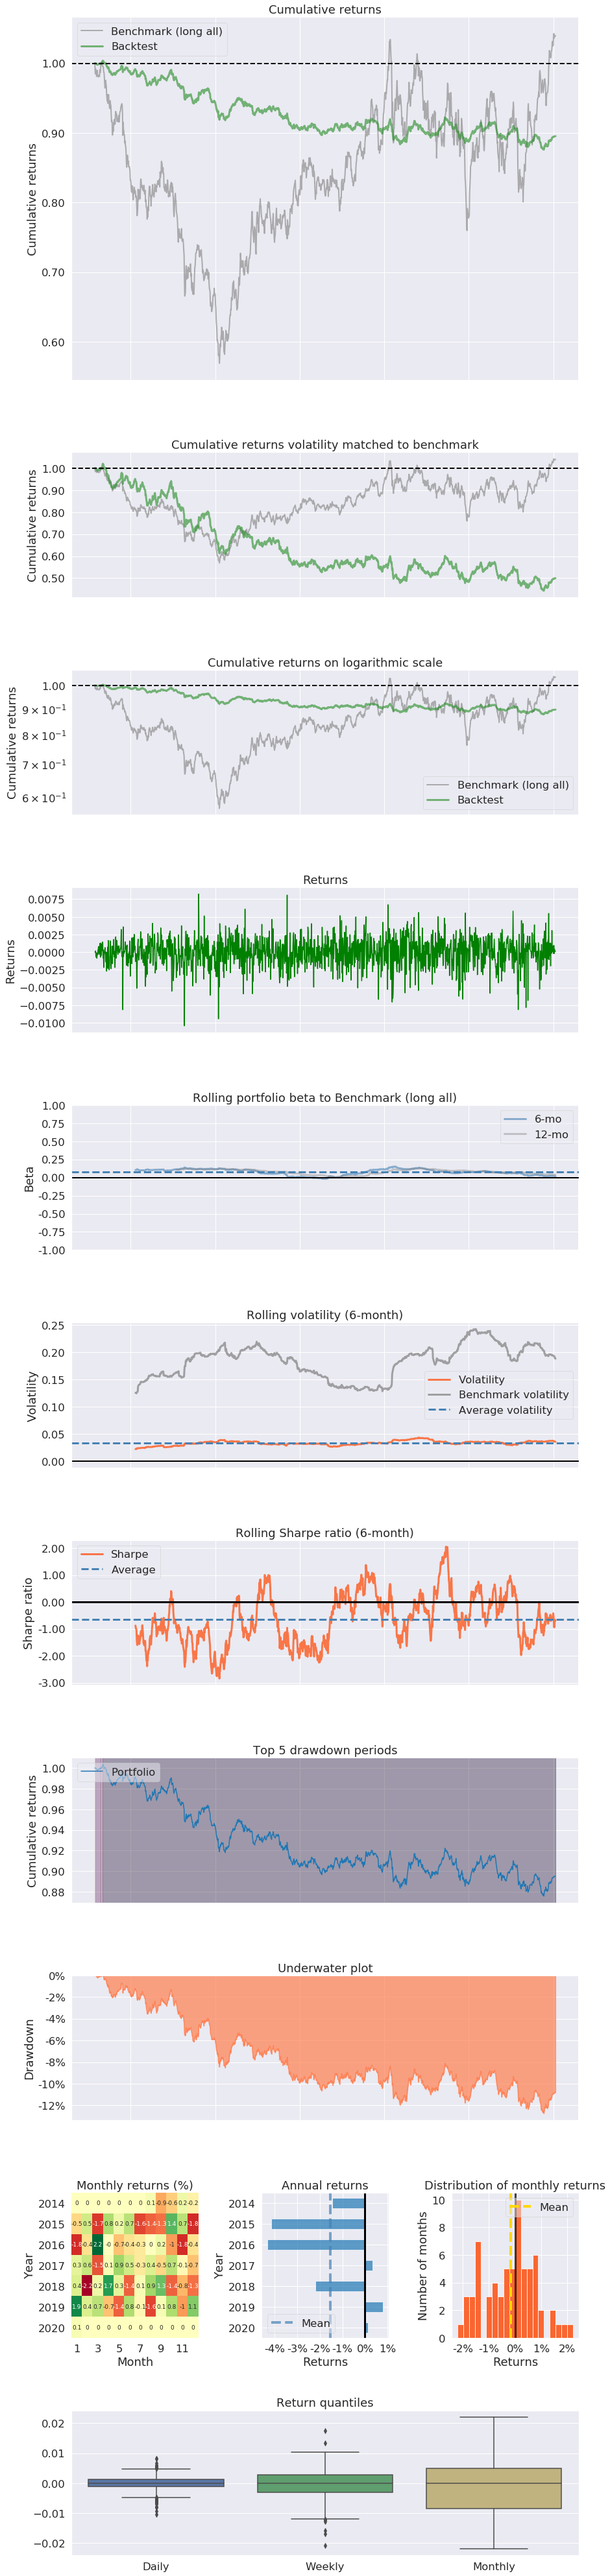

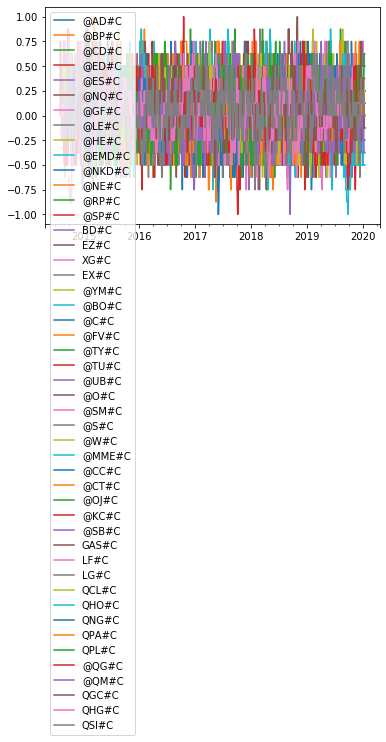

In [23]:
create_frontend_payload(files[0], True)

In [22]:
%debug

> c:\users\doda\pr\fincl\backend\mlbt\tearsheets.py(26)create_frontend_payload()
     24 
     25 def create_frontend_payload(file_name, force=False):
---> 26     new_file_name = F_PAYLOAD_DIR / file_name.basename().replace("payload_", "f_payload_", 1)
     27     have_file = False
     28     if not force:

ipdb> exit
